# Importing libraries and functions used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score,precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix

# Loading the dataset

In [2]:
dataset = pd.read_csv('connectionlossdata.csv')

c:\users\yasse\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#inspecting the first 5 rows of the dataset
dataset

,Unnamed: 0,TOPLAMSAAT,SORUNSAYISINET,PortErrorCount,LostCarrierCount,GecenAyPortErrorSayisi,GecmisFark,Kopma,Atlak,POSSEHIR,POSSEMT,SANTRALADI,GeneralDate,anonimid
0,0,22,1,0,0,0,0,NaN,NaN,Edi̇rne,ŞÜKRÜPAŞA,EDİRNE-1-54,2020-12-01,14216756
1,1,22,1,0,0,0,0,NaN,NaN,Edi̇rne,ŞÜKRÜPAŞA,EDİRNE-İSTASYON-54,2020-12-01,14216756
2,2,46,3,1,0,0,1,NaN,NaN,Edi̇rne,ŞÜKRÜPAŞA,EDİRNE-1-54,2020-12-02,14216756
3,3,46,3,1,0,0,1,NaN,NaN,Edi̇rne,ŞÜKRÜPAŞA,EDİRNE-İSTASYON-54,2020-12-02,14216756
4,4,50,3,1,0,0,1,NaN,NaN,Edi̇rne,ŞÜKRÜPAŞA,EDİRNE-1-54,2020-12-03,14216756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835374,4835374,12,2,1,0,0,1,NaN,NaN,Bursa,GEMLİK,GEMLİK-40,2020-12-13,10851226
4835375,4835375,0,2,0,0,0,0,NaN,NaN,İstanbul (anadolu),büyükçekmece,BÜYÜK ÇEKMECE,2020-12-13,32142961
4835376,4835376,4,2,0,0,0,0,NaN,NaN,Kocaeli̇,İZMİT,İZMİT-100,2020-12-13,41856739
4835377,4835377,11,1,0,0,0,0,NaN,NaN,Ankara,KEÇİÖREN,ETLİK-15,2020-12-13,11126214


# Data processing and cleaning

In [4]:
#filling the null cells in the 'kopma' columun with 'saglam'
dataset['Kopma']= dataset['Kopma'].fillna('saglam')

In [5]:
#dropping the useless cilumn 'Unnamed: 0'
dataset = dataset.drop(columns=['Unnamed: 0', 'GeneralDate', 'anonimid'])

In [6]:
#inspecting the values existing in the column that we need to predict
Counter(dataset['Kopma'])

Counter({'saglam': 4833722,
         'Sık Sık Kopuyor': 932,
         'İnternete Erişemiyor': 725})

In [7]:
# function used to merge the 'Sık Sık Kopuyor' and 'İnternete Erişemiyor' in one category
def merge(x):
    if x == 'Sık Sık Kopuyor' or x == 'İnternete Erişemiyor':
        return 0
    else:
        return 1

In [8]:
dataset['Kopma'] = dataset['Kopma'].apply(merge)

In [9]:
Counter(dataset['Kopma'])

Counter({1: 4833722, 0: 1657})

In [10]:
# balancing the number of 1's and 0's in 'kopma' column
index = dataset[dataset['Kopma'] == 1].index[5000:]
dataset.drop(index , inplace=True)

In [11]:
# now we shoild have 5000 of ones and 1657 zeros
Counter(dataset['Kopma'])


Counter({1: 5000, 0: 1657})

In [12]:
# trying to find which columns has null values so we can fill or drop them
for col in dataset.columns:
    print(col,':',dataset[col].isnull().sum())
    

TOPLAMSAAT : 0
SORUNSAYISINET : 0
PortErrorCount : 0
LostCarrierCount : 0
GecenAyPortErrorSayisi : 0
GecmisFark : 0
Kopma : 0
Atlak : 6657
POSSEHIR : 0
POSSEMT : 270
SANTRALADI : 44


In [13]:
# filling the missing rows with dummy values
dataset['Atlak']= dataset['Kopma'].fillna('AA')
dataset['POSSEHIR']= dataset['POSSEHIR'].fillna('BB')
dataset['POSSEMT']= dataset['POSSEMT'].fillna('CC')
dataset['SANTRALADI']= dataset['SANTRALADI'].fillna('DD')


In [14]:
#label encoding the data
label_encoder = LabelEncoder()
dataset = dataset.apply(LabelEncoder().fit_transform)
dataset

,TOPLAMSAAT,SORUNSAYISINET,PortErrorCount,LostCarrierCount,GecenAyPortErrorSayisi,GecmisFark,Kopma,Atlak,POSSEHIR,POSSEMT,SANTRALADI
0,22,0,0,0,0,10,1,1,21,299,96
1,22,0,0,0,0,10,1,1,21,299,97
2,46,2,1,0,0,11,1,1,21,299,96
3,46,2,1,0,0,11,1,1,21,299,97
4,50,2,1,0,0,11,1,1,21,299,96
...,...,...,...,...,...,...,...,...,...,...,...
4829430,48,2,0,0,0,10,0,0,78,147,188
4829683,6,5,1,0,0,11,0,0,78,281,52
4829684,25,8,1,1,0,11,0,0,78,281,52
4829686,23,0,1,0,0,11,0,0,78,281,52


# Trayining two different models

In [15]:
#geting labels column and data columns
y = dataset['Kopma'] # labels
X = dataset.drop(columns=['Kopma']) # data to be trained and tested on

In [16]:
#getting data ready to be used for training
x = X.iloc[:,:]
y = y.iloc[:]
x,y

(         TOPLAMSAAT  SORUNSAYISINET  PortErrorCount  LostCarrierCount  \
 0                22               0               0                 0   
 1                22               0               0                 0   
 2                46               2               1                 0   
 3                46               2               1                 0   
 4                50               2               1                 0   
 ...             ...             ...             ...               ...   
 4829430          48               2               0                 0   
 4829683           6               5               1                 0   
 4829684          25               8               1                 1   
 4829686          23               0               1                 0   
 4834614           0               0               1                 0   
 
          GecenAyPortErrorSayisi  GecmisFark  Atlak  POSSEHIR  POSSEMT  \
 0                             0    

In [17]:
# train, test seperation
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 1)

In [18]:
# KNN Model With number of neighbors = 5
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)


KNeighborsClassifier()

In [19]:
# Evaluation Metrics
# three four different evaluation matrics have been used in order to 
# estimate the performance of the model
# Accuracy
KNN_acc = clf.score(x_test, y_test)
print("KNN accuracy is: ",KNN_acc)

# Precision
y_pred = clf.predict(x_test)
KNN_precision_score = precision_score(y_test,y_pred)
print("KNN Precision is: ",KNN_precision_score)

# Recall (Senstivity)
KNN_recall = recall_score(y_test,y_pred)
print("KNN Recall is: ",KNN_recall)

KNN accuracy is:  0.9542042042042042
KNN Precision is:  0.9547169811320755
KNN Recall is:  0.9873170731707317


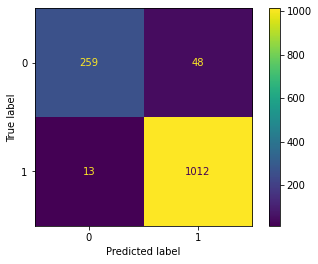

In [20]:
# Confusion Matrix for the KNN Model
plot_confusion_matrix(clf, x_test, y_test)

In [21]:
# Multilayer Perceptron Model
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-4,
                     hidden_layer_sizes=(32,16,8,4,2, 2), random_state=1,max_iter=1000)
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 16, 8, 4, 2, 2), max_iter=1000,
              random_state=1)

In [22]:
# Evaluation Metrics
# Accuracy
MLP_acc = clf.score(x_test, y_test)
print("MLP accuracy is: ",MLP_acc)

# Precision
y_pred = clf.predict(x_test)
MLP_precision_score = precision_score(y_test,y_pred)
print("MLP Precision is: ",MLP_precision_score)

# Recall (Senstivity)
MLP_recall = recall_score(y_test,y_pred)
print("MLP Recall is: ",MLP_recall)

MLP accuracy is:  0.9977477477477478
MLP Precision is:  0.9990234375
MLP Recall is:  0.9980487804878049


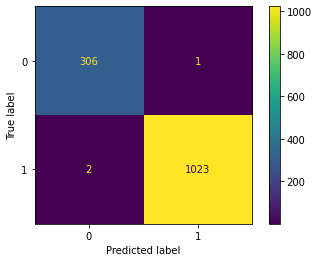

In [23]:
#ploting the confusion matrix 
plot_confusion_matrix(clf, x_test, y_test) 

# Evaluation Metrics
* Accuracy is the ratio of correctly predicted labels to the whole test set
* Precision represents the model's positive predections that are correct.  P = (TP/(TP+FP)
* Recall is percent of postive cases that the model predicts correctly.    RC = (TP/(TP+FN)

# Conclusion
According to the results from the evaluation metrics shown above for both KNN and MLP models,
we can clearly see that the MLP model overperfoms the KNN model in terms of all 3 metrics used to evaluate each one.
Hence, we would use MLP model for this specific problem.